# Домашнее задание
Поработайте с датасетом wine_data (в каждой строке этого датасета содержится информация о бутылках вина одного из трёх видов: в первой колонке - вид вина (1, 2 или 3), в колонках 1-13 - свойства вина). 

A. Решите задачу с помощью DecisionTreeClassifier:
- подберите гиперпараметры алгоритма по кросс-валидации
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

C. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты B и C можно скомбинировать для достижения наилучшего качества.

Далее попробуйте решить исходную задачу линейными методами. Не забудьте масштабировать данные перед применением этих методов:

D. Решите исходную задачу с помощью логистической регрессии.

E. Решите исходную задачу с помощью SVMClassifier с линейным и нелинейными ядрами.

F. Решите исходную задачу с помощью наивного байесовского классификатора (https://scikit-learn.org/stable/modules/naive_bayes.html).

G. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик MSE и R2?

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [3]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Считаем файл wine_data
data = pd.read_csv('wine_data.csv')
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [88]:
y = data['1']
X = data.drop('1', axis=1)

X.shape, y.shape

((177, 13), (177,))

## A. Решение задачи с помощью DecisionTreeClassifier 
### (подбор гиперпараметров алгоритма по кросс-валидации):

In [19]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params={'max_features': [None, 'log2', 'sqrt'], 
        'max_depth': [2, 4, 6, 8, 10, 20, 50]},

gs = GridSearchCV(DecisionTreeRegressor(), params, cv=3, n_jobs=-1)

gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=({'max_depth': [2, 4, 6, 8, 10, 20, 50],
                          'max_features': [None, 'log2', 'sqrt']},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [14]:
gs.best_score_

-21.04861111111111

In [21]:
gs.best_params_

{'max_depth': 10, 'max_features': 'sqrt'}

In [152]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

-22.877 (+/-50.424) for {'max_depth': 2, 'max_features': None}
-45.501 (+/-121.690) for {'max_depth': 2, 'max_features': 'log2'}
-23.027 (+/-52.696) for {'max_depth': 2, 'max_features': 'sqrt'}
-22.874 (+/-50.427) for {'max_depth': 4, 'max_features': None}
-33.893 (+/-87.460) for {'max_depth': 4, 'max_features': 'log2'}
-20.900 (+/-52.608) for {'max_depth': 4, 'max_features': 'sqrt'}
-22.874 (+/-50.427) for {'max_depth': 6, 'max_features': None}
-23.470 (+/-49.873) for {'max_depth': 6, 'max_features': 'log2'}
-42.150 (+/-113.103) for {'max_depth': 6, 'max_features': 'sqrt'}
-22.874 (+/-50.427) for {'max_depth': 8, 'max_features': None}
-21.835 (+/-52.850) for {'max_depth': 8, 'max_features': 'log2'}
-29.302 (+/-76.637) for {'max_depth': 8, 'max_features': 'sqrt'}
-22.874 (+/-50.427) for {'max_depth': 10, 'max_features': None}
-21.235 (+/-52.202) for {'max_depth': 10, 'max_features': 'log2'}
-24.894 (+/-64.186) for {'max_depth': 10, 'max_features': 'sqrt'}
-22.874 (+/-50.427) for {'max_

На кросс-валидации подобрали параметры.
Модель оказалась неэффективной и показала низкое качество.

## B. Добавление полиномиальных признаков
### Для этого cоздадим Pipeline:

In [194]:
from sklearn.preprocessing import StandardScaler    

dtrpipe = Pipeline([('scaler', StandardScaler()),
                      ('features', PolynomialFeatures(degree=2)),
                      ('dtr', DecisionTreeRegressor())])

params = {}

grid_dtr = GridSearchCV(dtrpipe, params, cv=3, n_jobs=-1)
grid_dtr.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('dtr',
                                        DecisionTreeRegressor(criterion='mse',
                                                              max_depth=None,
                                                              max_features=None,
     

In [195]:
grid_dtr.best_score_

-21.68181818181818

In [196]:
gs.best_params_

{'max_depth': 4, 'max_features': 'sqrt'}

Добавление полиномиальных признаков не оказало сильного влияния на модель.

 ## С. Матрица корреляций:
 #### Построим матрицу:

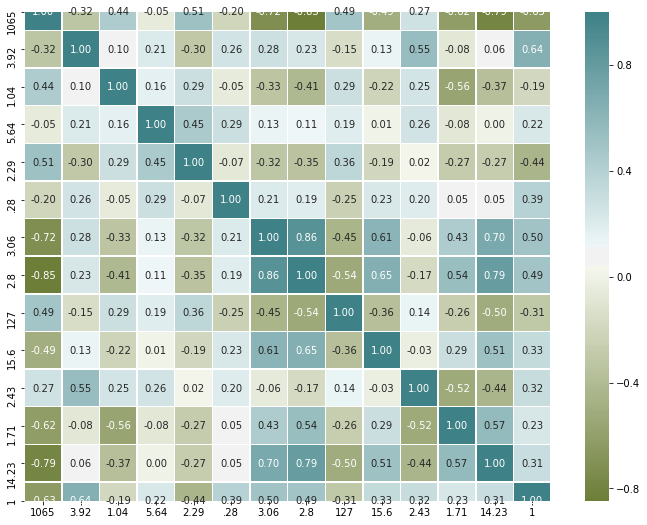

In [55]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[y, X],
                     columns= data.columns.tolist()[::-1])

plt.figure(figsize=(12,9))

corr = data1.corr()
sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

### Вывод: 
Наименьшую корреляцию с целевой переменной показали признаки:  '1.04' - 0.19;
                                                                      '5.64' - 0.22;
                                                                      '1.71' - 0.23.
 
#### Целевая переменная обозначена как "1"

Удалять данные признаки не имеет смысла, т.к. определнный вес на модель они оказывают.

## D. Решение задачи с помощью Логистической регрессии

In [68]:
from sklearn.linear_model import LogisticRegression               #импортируем логистическую регрессию

logit_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('logit', LogisticRegression(class_weight='balanced'))])     # Создаём Пайплайн

from sklearn.model_selection import cross_val_score

cross_val_score(logit_pipe, X, y, cv=3).mean()                # Обучаем на кросс-валидации

0.9607312163127476

Подбор гиперпараметров алгоритма улучшает его качество. Подберём значение параметра регуляризации C в логистической регрессии по кросс-валидации, используя GridSearchCV.

In [70]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {'logit__C': np.logspace(-2, 0, 20)}

#your code here
grid_logit = GridSearchCV(logit_pipe, param_grid, cv=3, n_jobs=-1)
grid_logit.fit(X, y)

Wall time: 4.48 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logit',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_cla

In [72]:
grid_logit.best_params_

{'logit__C': 0.08858667904100823}

In [73]:
grid_logit.best_score_

0.9661016949152542

Вывод: Подбор гиперпараметра С улучшил качество модели на 0.06. Модель логистической регрессии показала хорошее качество.

### Попробуем улучшить модель путём добавления новых полиномиальных признаков:

In [74]:
logit_pipe2 = Pipeline([('scaler', StandardScaler()),
                        ('features', PolynomialFeatures(degree=2)),
                        ('logit', LogisticRegression())])

In [80]:
%%time

param_grid = {'logit__C': np.logspace(-2, 0, 20)}

#your code here
grid_logit2 = GridSearchCV(logit_pipe2, param_grid, cv=3, n_jobs=-1)
grid_logit2.fit(X, y)

Wall time: 261 ms


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('logit',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                          

In [76]:
grid_logit2.best_params_

{'logit__C': 0.01}

In [81]:
grid_logit2.best_score_

0.9830508474576272

## Вывод:
Использование масштабирования, добавления полиномиальных признаков (в квадрате) и применение модели логистической регрессии, объединенные  в один пайплайн, позволили добиться наилучшего качества работы алгоритма.

## E. Решение задачи с помощью SVMClassifier с линейным и нелинейными ядрами


In [178]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVC            # "Support vector classifier"
model = SVC(kernel='linear', class_weight='balanced')

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,
                                                random_state=111)

In [179]:
scaler = StandardScaler().fit(Xtrain)         #обучаемся только на трейне, используя StandardScaler
Xtrain = scaler.transform(Xtrain)       
Xtest = scaler.transform(Xtest)

In [181]:
%time model.fit(Xtrain, ytrain)
ypred_train = model.predict(Xtrain)
ypred_test = model.predict(Xtest)

r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test) 

Wall time: 0 ns


(1.0, 0.9551681195516812)

Модель имеет небольшое переобучение. Качество модели Оказалось несколько хуже, чем в предыдущем методе. Попробуем использовать модель SVM с другим ядром:

In [182]:
model2 = SVC(kernel='rbf', class_weight='balanced')
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,
                                                random_state=111)

In [185]:
scaler = StandardScaler().fit(Xtrain)         #обучаемся только на трейне, используя StandardScaler
Xtrain = scaler.transform(Xtrain)       
Xtest = scaler.transform(Xtest)

In [187]:
%time model2.fit(Xtrain, ytrain)
ypred_train = model2.predict(Xtrain)
ypred_test = model2.predict(Xtest)

r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test) 

Wall time: 0 ns


(0.8792601472854941, 0.9103362391033624)

Качество модели с линейном ядром оказалось выше. Переобучения в данном случае нет. Но качество на тесте хуже, чем было получено ранее.

## F. Решение задачи с помощью наивного байесовского классификатора

In [144]:
data = pd.read_csv('wine_data.csv')
data.head()

yfull = data['1']
Xfull = data.drop('1', axis=1)

Существуют следующие виды классификаторов Байеса:

- GaussianNB;
- MultinomialNB;
- ComplementNB;
- BernoulliNB;
- CategoricalNB.

Импортируем для данной задачи модели: GaussianNB, BernoulliNB и найдем качество на кросс-валидации.

In [145]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

model1 = GaussianNB()
model2 = BernoulliNB()

for model in [model1, model2]:
    log_pipe = Pipeline([('scaler', StandardScaler()), \
                       ('logit', model)])
    print(model)
    print(cross_val_score(log_pipe, X, y, cv=3).mean())

GaussianNB(priors=None, var_smoothing=1e-09)
0.9605396454315215
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.9158127151113709


Модель GaussianNB показало лучшее качество, чем BernoulliNB. Данное качество модели, обученной на кросс-валидации с тремя фолдами сопоставимо с качеством модели логистической регрессии.

## Вывод: 
#### 1) Наилучшее качество показало использование модели Логистической регрессии. В задаче классификации MSE не использовалось, оценка производилась по accuracy_score и R2_score.
##### 2) В случае с логистической регрессией удалось получить результат близкий к 1. Что в данной метрике свидетельствует об очень хорошем качестве модели.
##### 3) Дерево решений оказалось наихудщим методом решения данной задачи.
